In [1]:
import re
import numpy as np
import pandas as pd
import skopt

In [2]:
funcs = pd.read_csv('funcs.csv')

In [3]:
funcs

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Bronchus,MaxDvh,"[390,1560]",18.52,NaN,1
1,Bronchus,MaxDose,"[870,3480]",0.00,NaN,1
2,Chestwall_L,MaxDvh,"[750,3000]",2.04,NaN,1
3,D2cm,MaxDose,"[600,2400]",0.00,NaN,1
4,Esophagus,MaxDvh,"[470,1880]",16.91,NaN,1
5,Esophagus,MaxDose,"[750,3000]",0.00,NaN,1
6,GreatVes,MaxDvh,"[1075,4300]",5.66,NaN,1
7,GreatVes,MaxDose,"[1225,4900]",0.00,NaN,1
8,Heart,MaxDvh,"[700,2800]",1.84,NaN,1
9,Heart,MaxDose,"[850,3400]",0.00,NaN,1


In [4]:
funcs2 = pd.read_csv('funcs.csv').astype(object)

In [6]:
for row in funcs.rows:
    print(row)

AttributeError: 'DataFrame' object has no attribute 'rows'

In [7]:
# dummy example to see saving results format

noise_level = 0.1

def f(x, noise_level=noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2))\
           + np.random.randn() * noise_level

In [9]:
import matplotlib.pyplot as plt

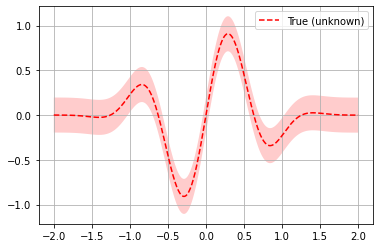

In [10]:
# Plot f(x) + contours
x = np.linspace(-2, 2, 400).reshape(-1, 1)
fx = [f(x_i, noise_level=0.0) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx],
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")
plt.legend()
plt.grid()
plt.show()

In [11]:
from skopt import gp_minimize

res = gp_minimize(f,                  # the function to minimize
                  [(-2.0, 2.0)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=15,         # the number of evaluations of f
                  n_random_starts=5,  # the number of random initialization points
                  noise=0.1**2,       # the noise level (optional)
                  random_state=1234)   # the random seed

In [12]:
"x^*=%.4f, f(x^*)=%.4f" % (res.x[0], res.fun)

'x^*=-0.1248, f(x^*)=-0.6617'

In [13]:
print(res)

          fun: -0.6617493475194893
    func_vals: array([-0.02812249,  0.04201645,  0.72570853, -0.23144184, -0.20844531,
        0.01147144, -0.22359434, -0.00836083, -0.04080589,  0.06233758,
       -0.05192105, -0.66174935, -0.59747956, -0.48846077, -0.40062029])
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=2, noise=0.010000000000000002,
                         normalize_y=True, random_state=822569775), GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=2, noise=0.010000000000000002,
                         normalize_y=True, random_state=822569775), GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=2, noise=0.010000000000000002,
                         normalize_y=True

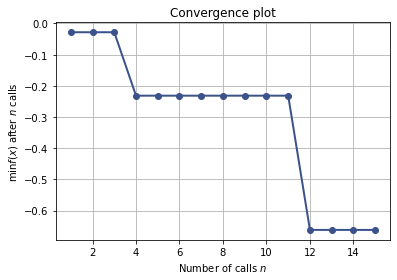

In [14]:
from skopt.plots import plot_convergence
plot_convergence(res);

In [15]:
np.save('restest.npy', res)

In [17]:
k = np.load('restest.npy', allow_pickle=True)

In [18]:
k

array(          fun: -0.6617493475194893
    func_vals: array([-0.02812249,  0.04201645,  0.72570853, -0.23144184, -0.20844531,
        0.01147144, -0.22359434, -0.00836083, -0.04080589,  0.06233758,
       -0.05192105, -0.66174935, -0.59747956, -0.48846077, -0.40062029])
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=2, noise=0.010000000000000002,
                         normalize_y=True, random_state=822569775), GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=2, noise=0.010000000000000002,
                         normalize_y=True, random_state=822569775), GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=2, noise=0.010000000000000002,
                         normalize_

In [28]:
def change_dict(my_dict):
    my_dict['new_key'] = 'new_value'

In [29]:
temp_dict = {'old_key': 'old_value'}

In [30]:
temp_dict

{'old_key': 'old_value'}

In [31]:
change_dict(temp_dict)

temp_dict

In [32]:
temp_dict

{'old_key': 'old_value', 'new_key': 'new_value'}

In [33]:
# If I create a lambda function with a dictionary, does the dictionary change each iteration?

In [159]:
goals = {'Rib': [], 'Heart': []}

In [150]:
for index, key in enumerate(goals):
    print(index, key)

0 Rib
1 Heart


In [160]:
def objective(my_dict, a):
    for index, key in enumerate(my_dict):
        my_dict[key].append(a[index])

In [161]:
obj = lambda a: objective(goals, a)

In [162]:
for ii in range(20):
    obj([ii, ii*2])

In [163]:
goals

{'Rib': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 'Heart': [0,
  2,
  4,
  6,
  8,
  10,
  12,
  14,
  16,
  18,
  20,
  22,
  24,
  26,
  28,
  30,
  32,
  34,
  36,
  38]}

In [164]:
funcs = pd.read_csv('funcs.csv')

In [167]:
set(funcs['Roi'])

{'Bronchus',
 'Chestwall_L',
 'D2cm',
 'Esophagus',
 'GreatVes',
 'Heart',
 'Lungs',
 'PTV',
 'Pericardium',
 'Rib',
 'Skin',
 'SpinalCanal',
 'Trachea'}

In [168]:
goal_dict = {ii: [] for ii in range(len(funcs))}

In [169]:
goal_dict

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: []}

In [172]:
goal_dict = np.load('goal_dict.npy', allow_pickle=True)

In [185]:
goal_dict.item()

{0: [902.9539562360069,
  887.0267800488715,
  885.723223702955,
  885.742573222834,
  885.8221795707578],
 1: [2083.581298828125,
  2062.094970703125,
  2060.97509765625,
  2060.9970703125,
  2061.087158203125],
 2: [1773.607101374759,
  1753.7093233390606,
  1753.8778385711137,
  1753.782987440482,
  1753.8073465800444],
 3: [2677.121826171875,
  2701.855712890625,
  2706.418701171875,
  2706.37548828125,
  2706.195556640625],
 4: [666.7869344701171,
  655.9861409884825,
  655.2879657005077,
  655.2983124843128,
  655.4159818197915],
 5: [1101.2125244140625,
  1084.6480712890625,
  1083.615234375,
  1083.63232421875,
  1083.701904296875],
 6: [1089.6203228648899,
  1080.721770345286,
  1080.3781958343875,
  1080.379761588357,
  1080.3991612196194],
 7: [1546.90234375,
  1542.457275390625,
  1542.820556640625,
  1542.82275390625,
  1542.83056640625],
 8: [829.3638071493834,
  819.1200064626302,
  818.4953487491466,
  818.5082882022716,
  818.5820119396849],
 9: [1411.49169921875,
  13

In [177]:
for ii in goal_dict.keys():
    plt.plot(goal_dict[ii])

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [193]:
import pickle

In [198]:
pickle.load(open('models.npy', 'rb'))

EOFError: Ran out of input